## Visualizacion de variables de un DataFrame

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('./data/GBvideos.csv')
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...


### Graficar valores de una variable

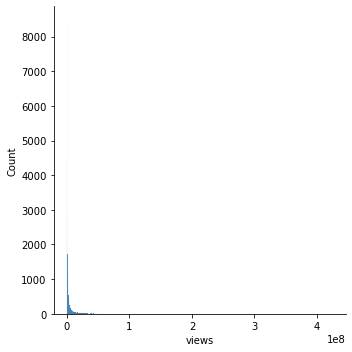

In [3]:
# grafica de distribucion de la variable views
ax = sns.displot(df['views'])

In [5]:
# lista de variables del dataframe con las que se van a trabajar
lista = ['views', 'likes', 'dislikes', 'comment_count']

### Grafica pairplot para varias variables

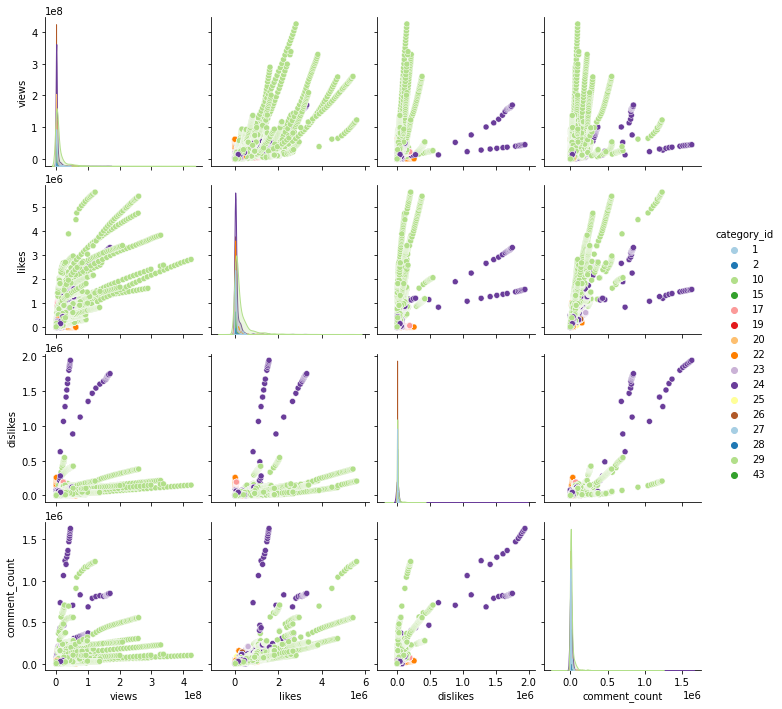

In [6]:
sns.pairplot(df,
            vars=lista, 
            hue='category_id', 
            palette='Paired')

### Seleccionar un conjunto de registros que cumplan unas condiciones

In [7]:
df.shape

(38916, 16)

In [10]:
#seleccion de registros que cumplan las condiciones
medio = (df['views'] > 1e6)&(df['views'] < 10e6)

In [11]:
# nuevo dataframe con los datos seleccionados
df2 = df[medio]
df2.shape

(14491, 16)

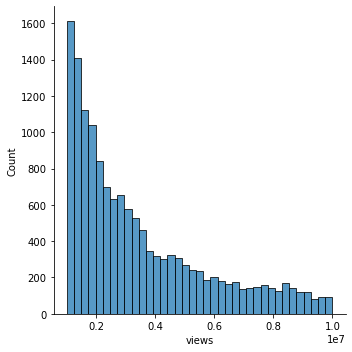

In [13]:
# grafica de distribucion de los datos seleccionados
ax = sns.displot(df2['views'])

### Sumar valores de una columna que cumplen una condicion

In [15]:
# sumar todos los valores de la views que sean de category_id igual a 22
df.loc[df['category_id'] == 22]['views'].sum()

5754287829

In [16]:
# sumar todos los valores de la views que sean de category_id igual a 24
df.loc[df['category_id'] == 24]['views'].sum()

29786283041

### Cambiar valores de una variable numerica por valores categoricos con map

In [17]:
# diccionario con valores y su respectiva etiqueta
etiquetas = {
        2: 'Autos & Vehicles',1 :  'Film & Animation',10 : 'Music',
        15 : 'Pets & Animals',17 : 'Sports',18 : 'Short Movies',
        19 : 'Travel & Events',20 : 'Gaming',21: 'Videoblogging',
        22 : 'People & Blogs',23:'Comedy',24:'Entertainment',
        25 : 'News & Politics',26 : 'Howto & Style',27 : 'Education',
        28 : 'Science & Technology',29 :'Nonprofits & Activism',
        30 : 'Movies',31 : 'Anime/Animation',32 : 'Action/Adventure',
        33 : 'Classics',34 : 'Comedy',35 : 'Documentary',36 : 'Drama',
        37 : 'Family',38 : 'Foreign',39 : 'Horror',40 : 'Sci:Fi/Fantasy',
        41 : 'Thriller',42 : 'Shorts',43 : 'Shows',44 : 'Trailers'
}

In [20]:
df['category_id_n'] = df['category_id']
df['category_id_n'] = df.category_id_n.map(etiquetas)
df['category_id_n'].head()

0      Howto & Style
1      Entertainment
2              Music
3             Sports
4    News & Politics
Name: category_id_n, dtype: object

### Agrupar valores 

In [22]:
#       columna principal  columna_valor op  resetear_indices  ordenar_valores_por_columna_valor descendente
z = df.groupby(['category_id_n']).views.sum().reset_index().sort_values('views', ascending=False)
z

,category_id_n,views
7,Music,171160864769
3,Entertainment,29786283041
4,Film & Animation,8362707626
10,People & Blogs,5754287829
1,Comedy,3962062143
14,Sports,3341736194
5,Gaming,1746619532
12,Science & Technology,1641388256
8,News & Politics,1409131375
6,Howto & Style,1190155227
